In [1]:
import os

os.environ[
    "OMP_NUM_THREADS"
] = "64"  # for jupyter.nersc.gov otherwise the notebook only uses 2 cores

import numpy as np

In [18]:
import ForSEplus

from ForSEplus import my_forse_class

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rc('image', cmap='coolwarm')

In [4]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Training 

In [9]:
training_file = '/pscratch/sd/j/jianyao/SCRATCH/ForSE/training_data_Nico_T12amin_U20amin_348_random_snr_1.npy'
# np.load('/pscratch/sd/j/jianyao/SCRATCH/ForSE/training_data_Nico_T12amin_U20amin_348_random_snr_1.npy')

In [5]:
dirs = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_U_jupyter_revised/'
# dirs = '/pscratch/sd/j/jianyao/forse_output/3_arcmin_348_models_MY_lr_5e-5_U_jupyter_revised/'

# dirs = '/pscratch/sd/j/jianyao/forse_output/3_arcmin_8000_models_MY_lr_5e-5_Q_jupyter/' # 20' to 3'
# dirs = '/pscratch/sd/j/jianyao/forse_output/3_arcmin_8000_models_MY_lr_5e-5_U_jupyter/' # 20' to 3'
# dirs = '/pscratch/sd/j/jianyao/forse_output/3_arcmin_from_12amin_348_models_MY_lr_5e-5_Q/' # 12' to 3'

# dirs = '/pscratch/sd/j/jianyao/forse_output/Random_12amin_MY_lr_5e-5_Q_jupyter_snr_10_extended/' # 20' to 3'
checkpoint_dir = dirs + 'training_checkpoints'

In [6]:
test_forse = my_forse_class.forse_my(dirs)
test_forse.build_gan()
test_forse.check_point()
# test_forse.train(epochs=200001, patches_file=training_file, batch_size=16, save_interval=500)

restore from checkpoint:/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_U_jupyter_revised/training_checkpoints/ckpt-400


# pick the best epoch

In [10]:
import check_model
from importlib import reload
reload(check_model)

<module 'check_model' from '/global/u2/j/jianyao/ForSEplus_github/src/ForSEplus/check_model.py'>

In [12]:
from check_model import get_MFs_fix, plot_MF

{246, 0.740} {231, 0.667}
[0.79 0.74 0.69] [0.64 0.69 0.67]


NameError: name 'plot_MF' is not defined

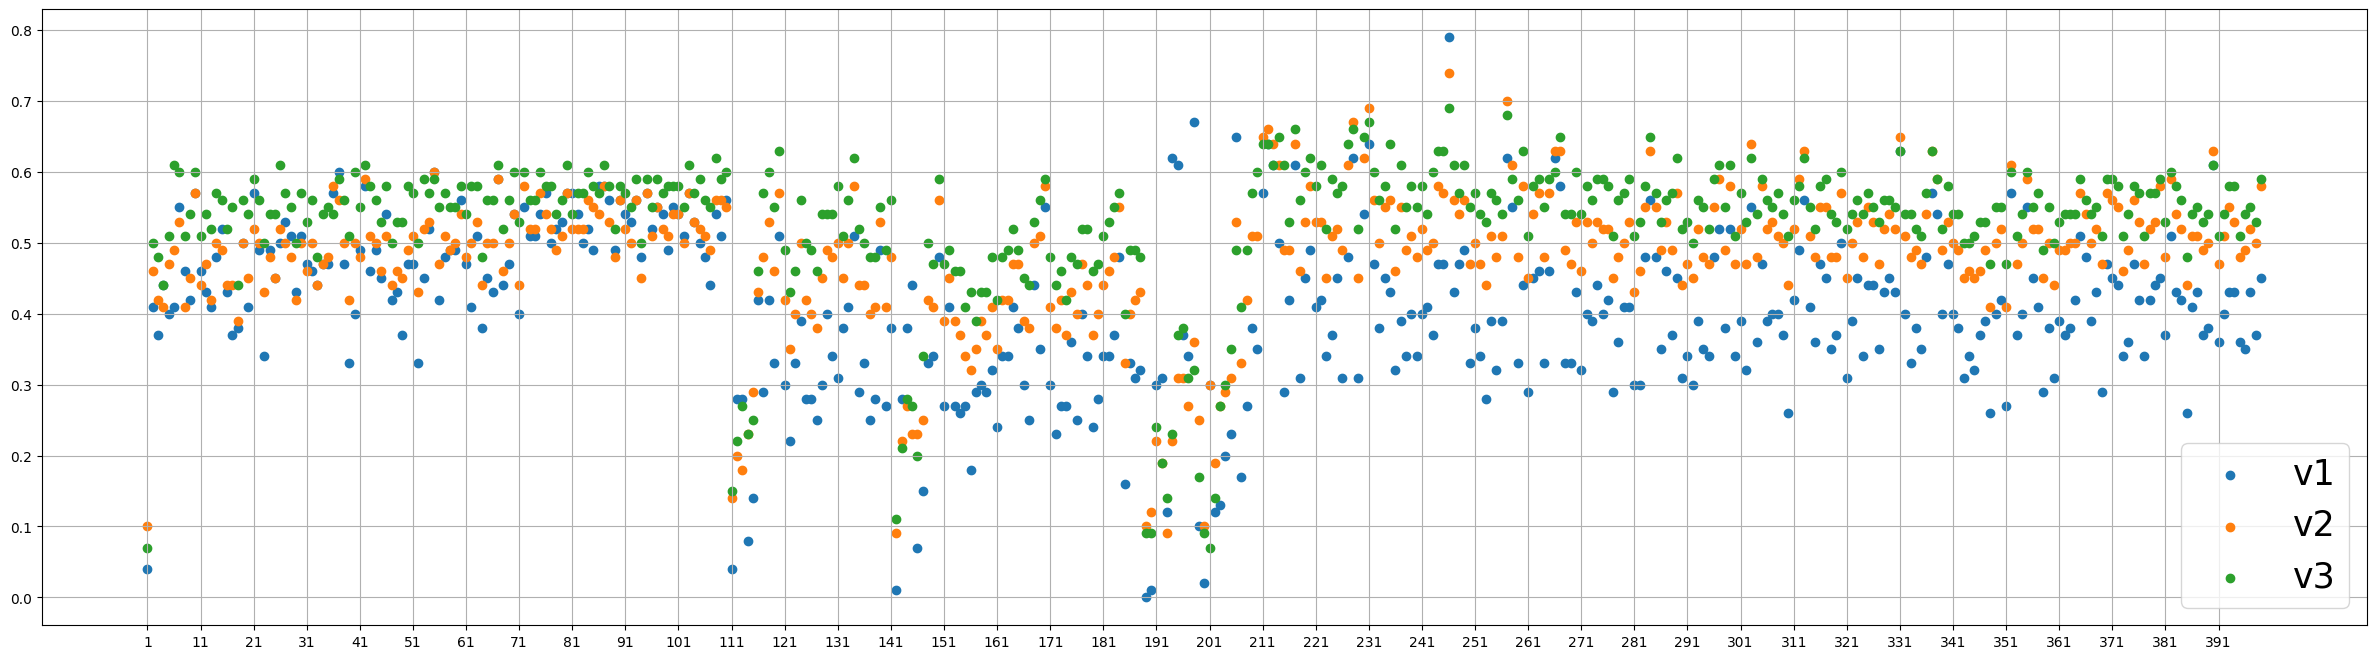

In [11]:
data_dir = '/pscratch/sd/j/jianyao/SCRATCH/ForSE/training_data_Nico_T12amin_Q20amin_348_random_snr_1.npy'
MF_dir = '/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Random_random_3_arcmin_MY_Q_jupyter_348_MFs_lr_5e-5_snr_1.txt'
model_dir = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_Q_jupyter_revised/'
results = get_MFs_fix(input_patches=348, data_dir = data_dir, model_dir = model_dir, MF_dir = MF_dir, checkpoint=test_forse.checkpoint)


/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_Q_jupyter_with_seed_020.txt
{246, 0.707} {212, 0.660}
[0.72 0.72 0.68] [0.65 0.67 0.66]
/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_Q_jupyter_with_seed_050.txt
{246, 0.687} {212, 0.643}
[0.69 0.71 0.66] [0.6  0.66 0.67]
/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_Q_jupyter_with_seed_080.txt
{246, 0.710} {212, 0.647}
[0.72 0.73 0.68] [0.61 0.66 0.67]


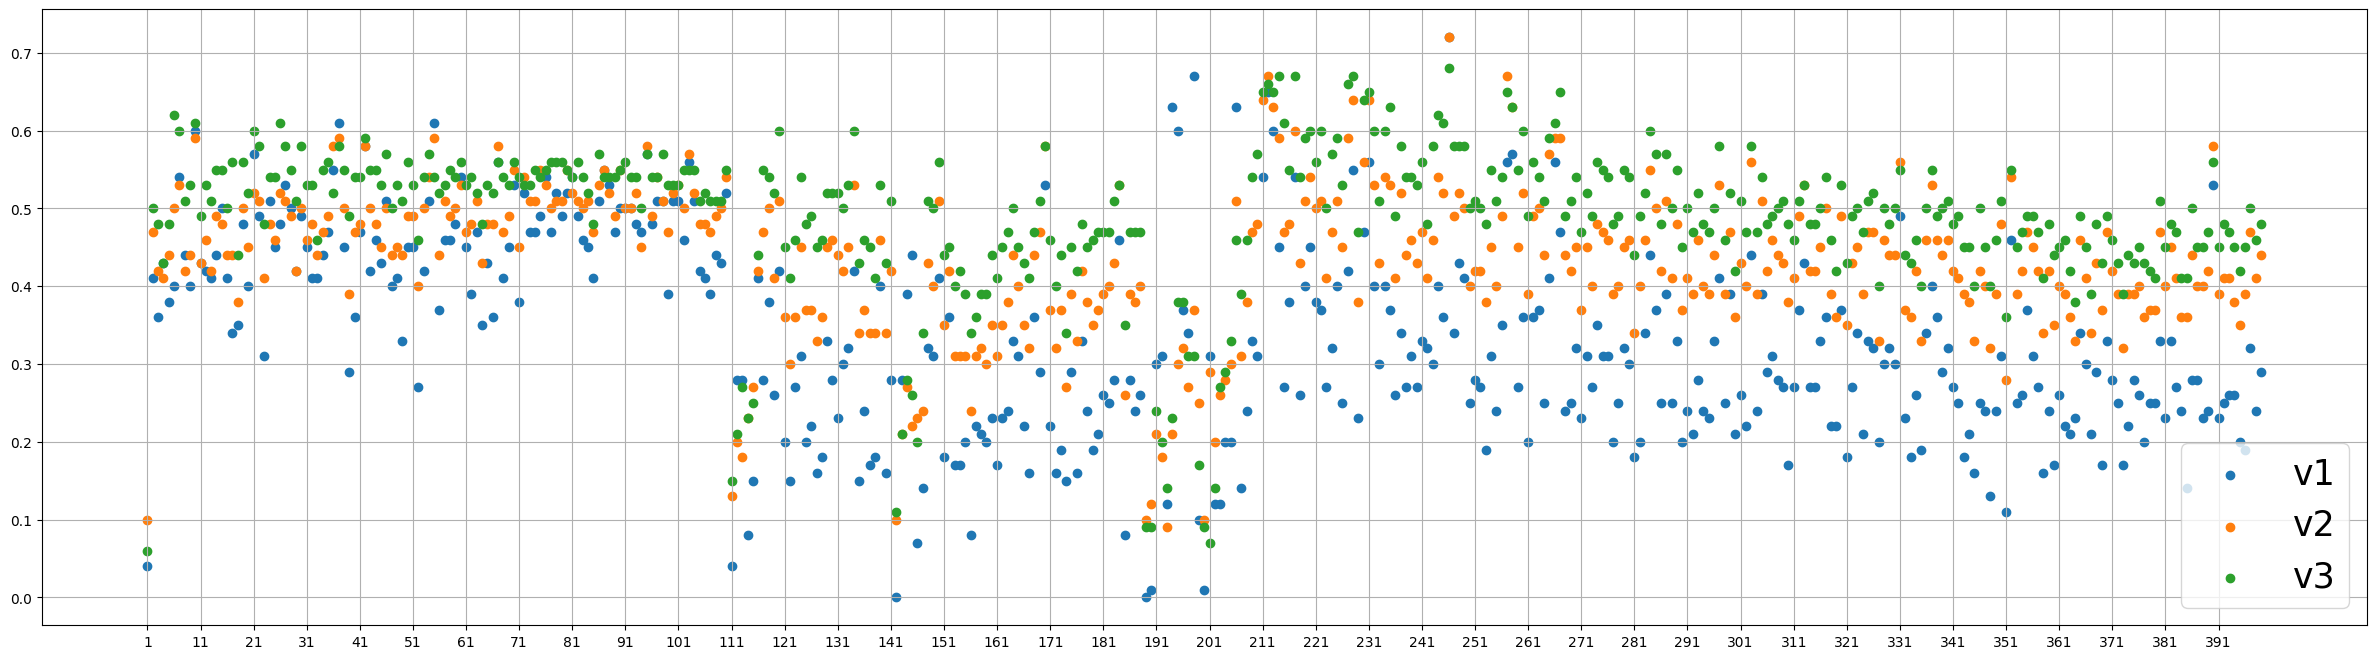

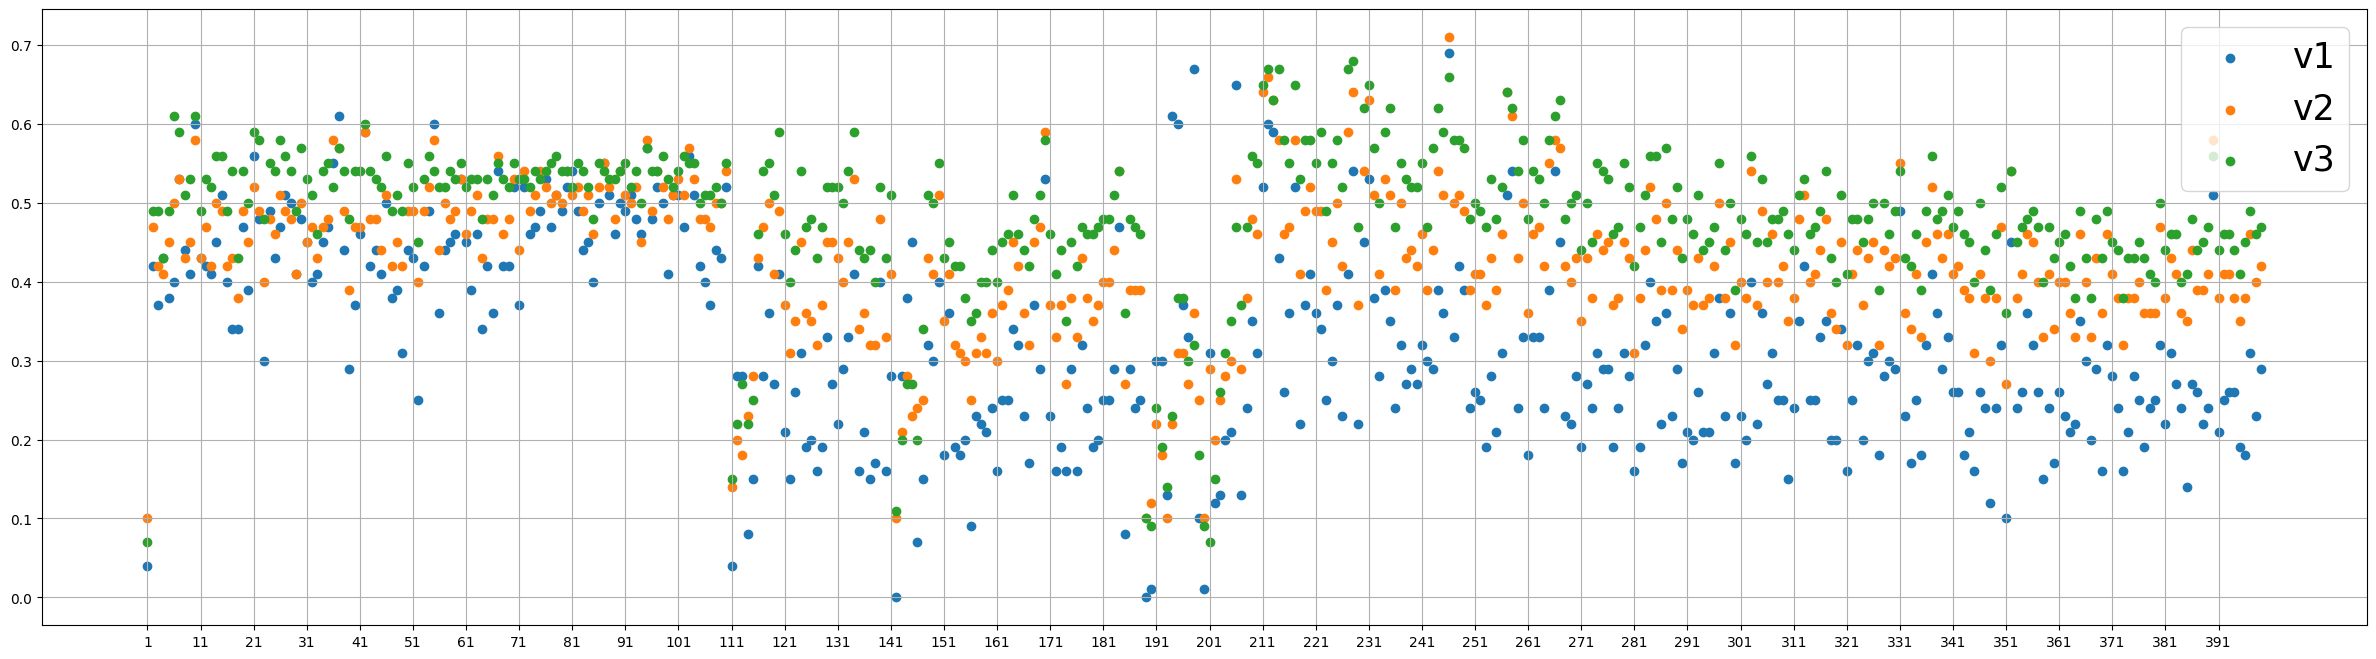

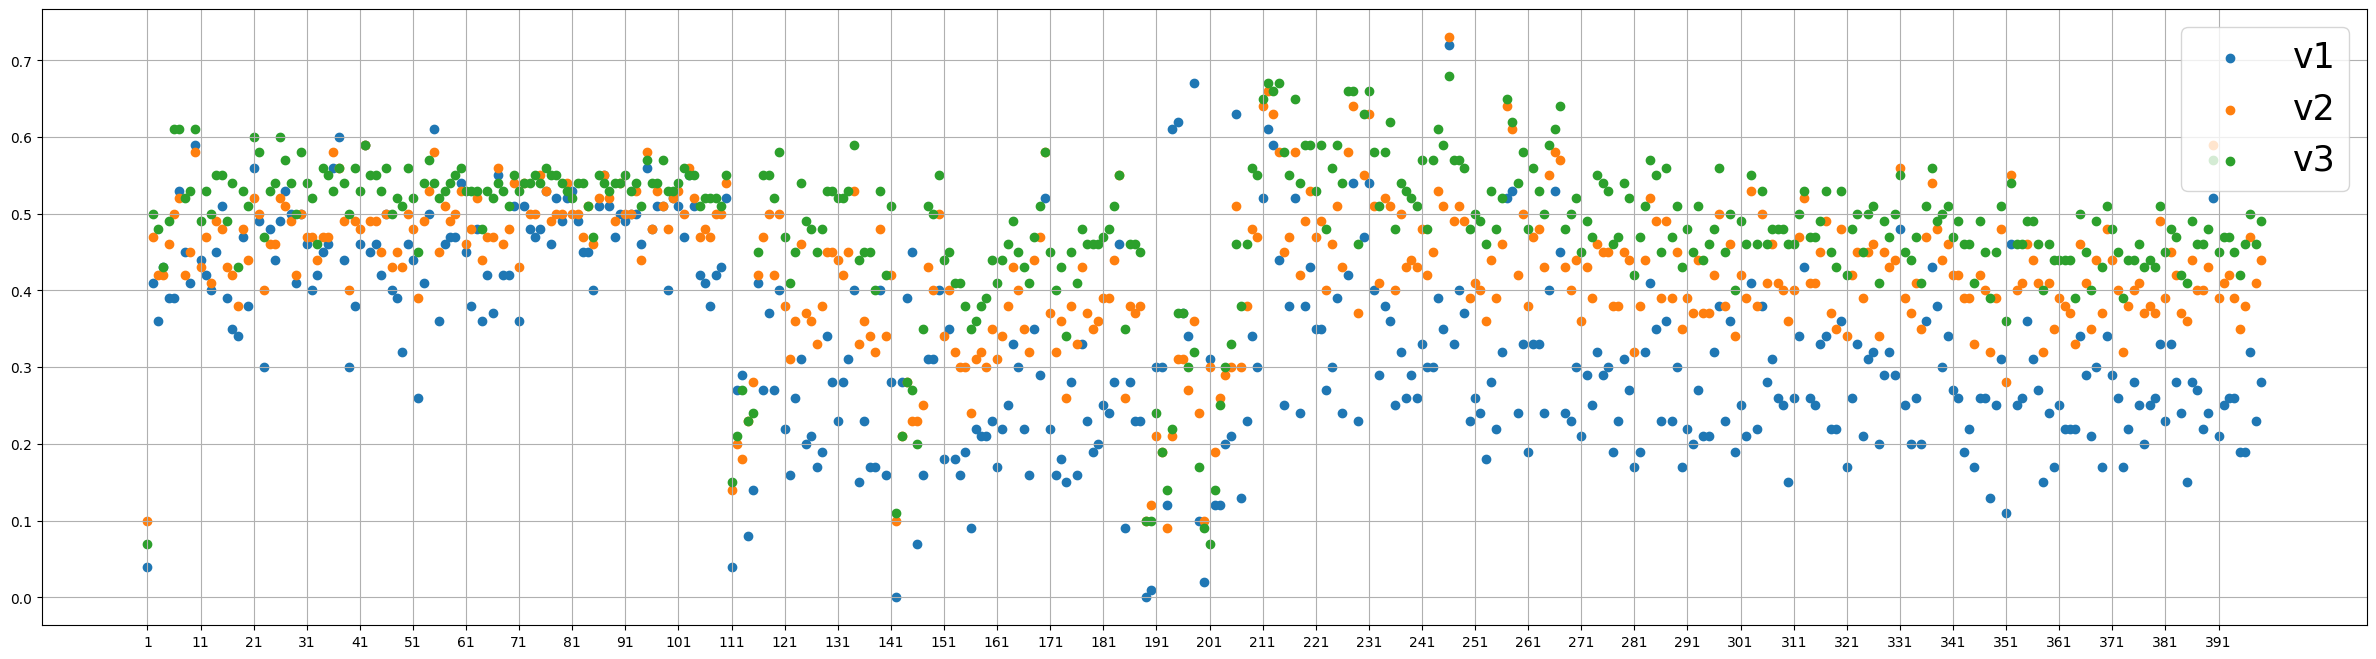

In [18]:
dir_name = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/Random_snr_1_3amin/'  
model_dir = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_Q_jupyter_revised/'
MF_dir = '/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/'
for n in range(20, 90, 30):
    MFs = MF_dir + 'Test_Random_random_3_arcmin_MY_Q_jupyter_with_seed_%03d.txt'%(n);
    print(MFs)
    test_data = np.load(dir_name + 'testing_data_Nico_T12amin_Q20amin_348_random_snr_1_%03d.npy'%n) 
    # run with previous data with [348, 320, 320], should run with [8526, 320, 320] 2023/05/29

    results = get_MFs_fix(input_patches=348, data_dir = test_data, model_dir = model_dir, MF_dir = MFs, checkpoint=test_forse.checkpoint)
    # plot_MF(results, titles[k], savedir = False)

/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_U_jupyter_with_seed_020.txt
{28, 0.660} {123, 0.650}
[0.67 0.67 0.64] [0.64 0.65 0.66]
/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_U_jupyter_with_seed_050.txt
{28, 0.643} {175, 0.640}
[0.65 0.65 0.63] [0.64 0.65 0.63]
/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_U_jupyter_with_seed_080.txt
{28, 0.650} {123, 0.640}
[0.66 0.67 0.62] [0.64 0.65 0.63]


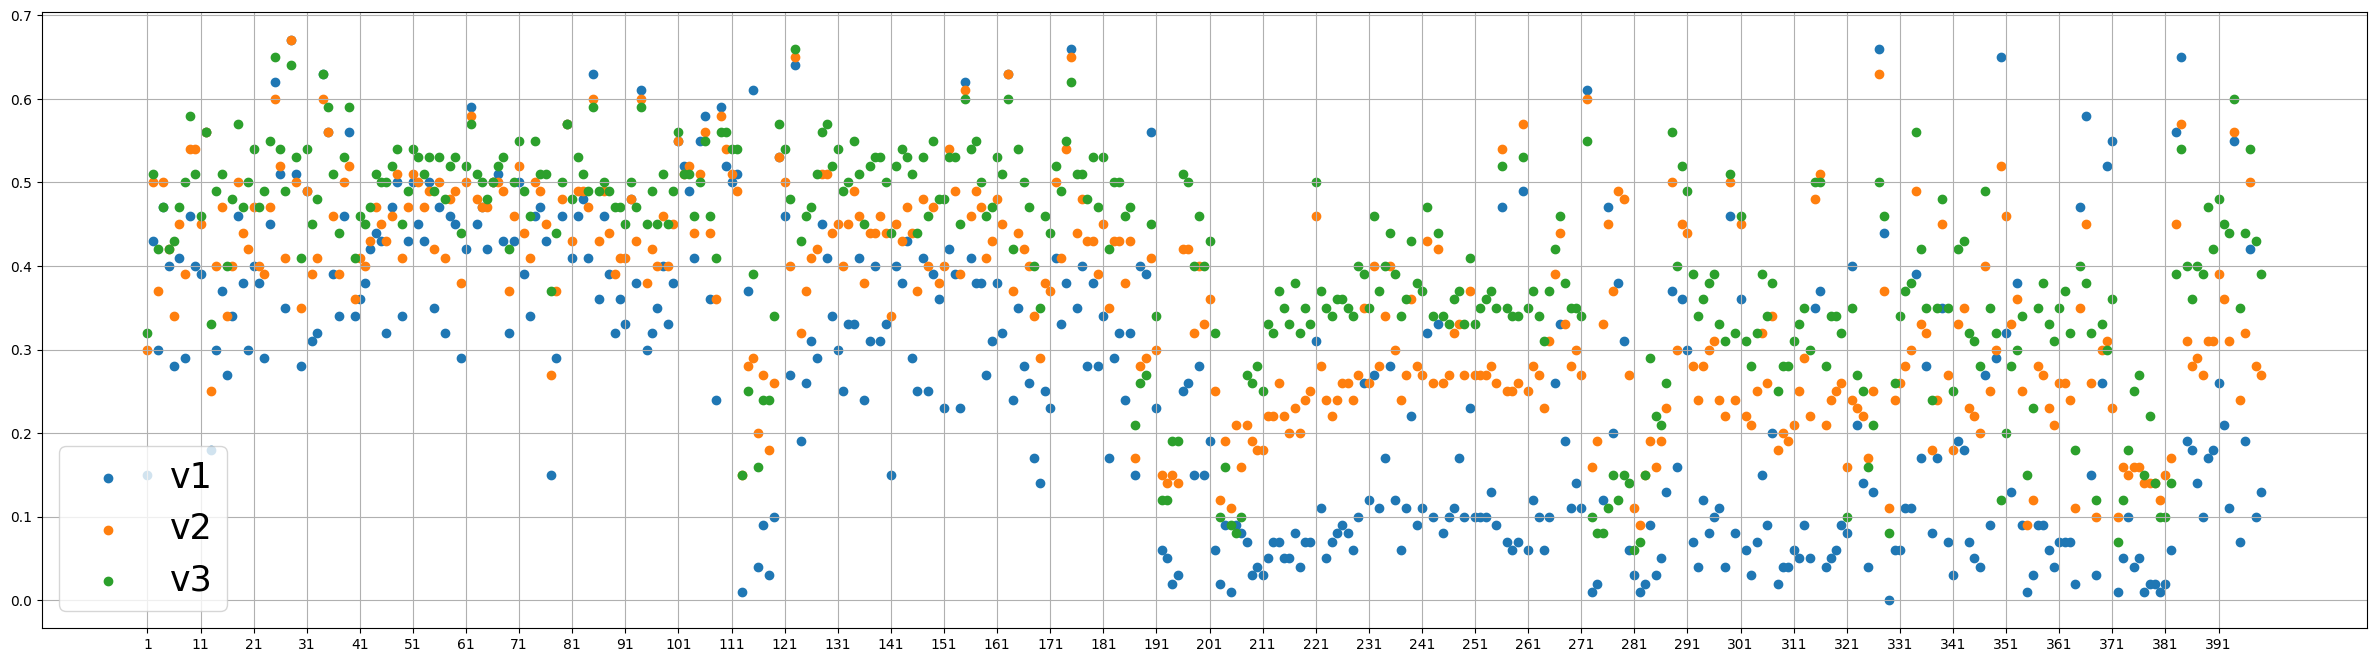

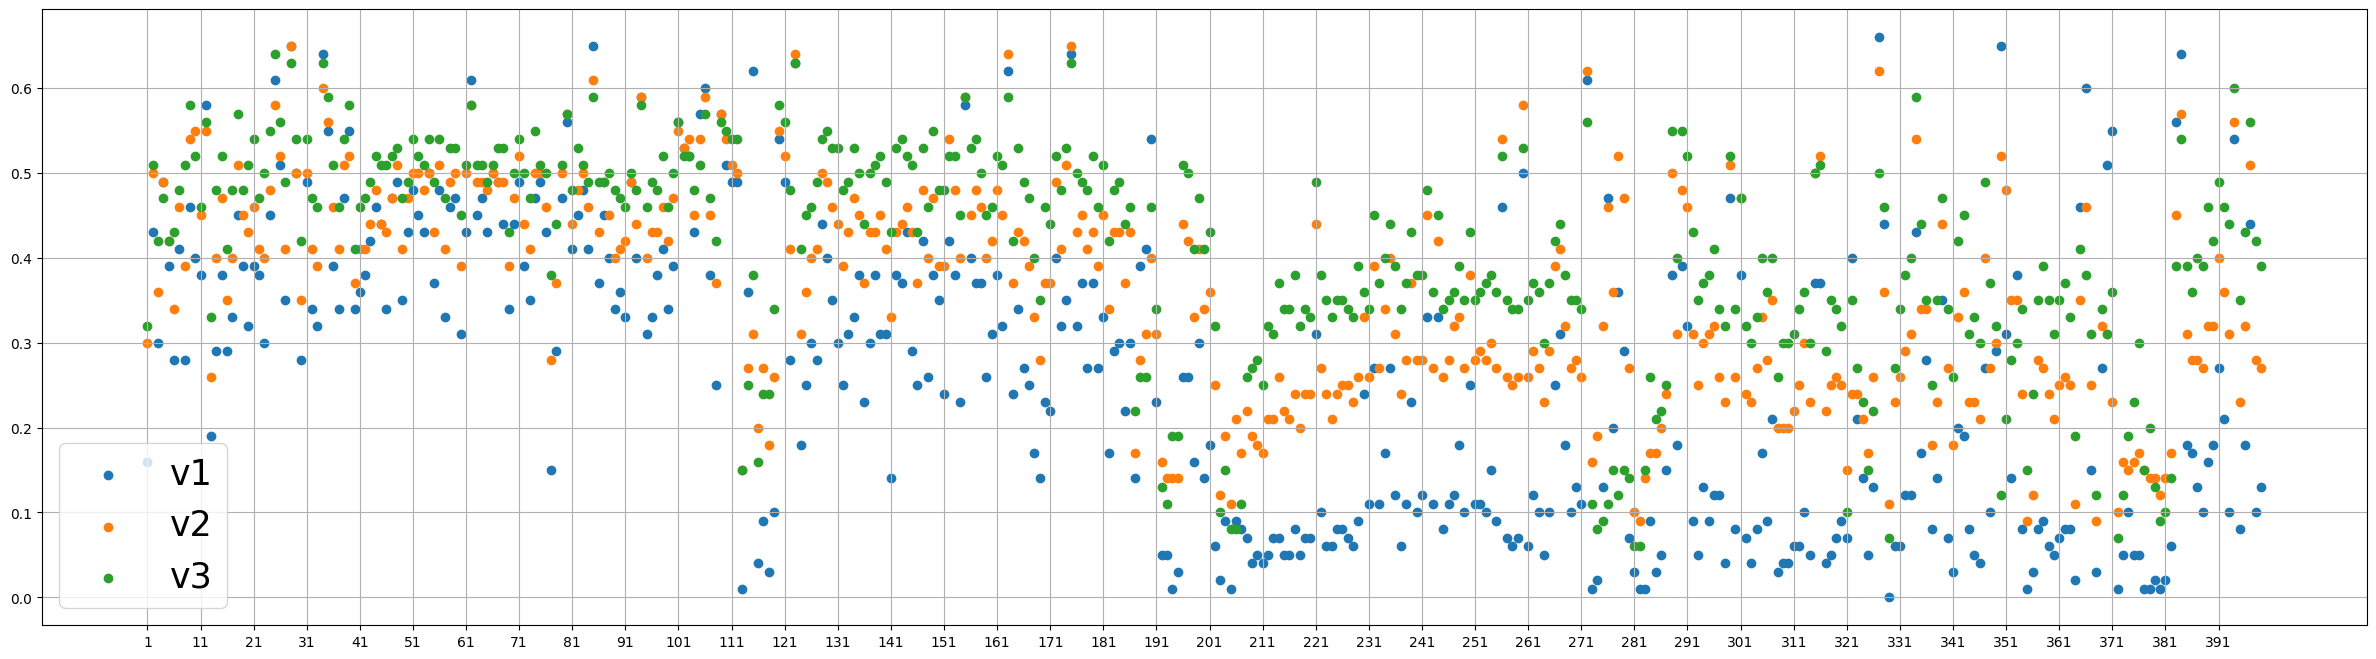

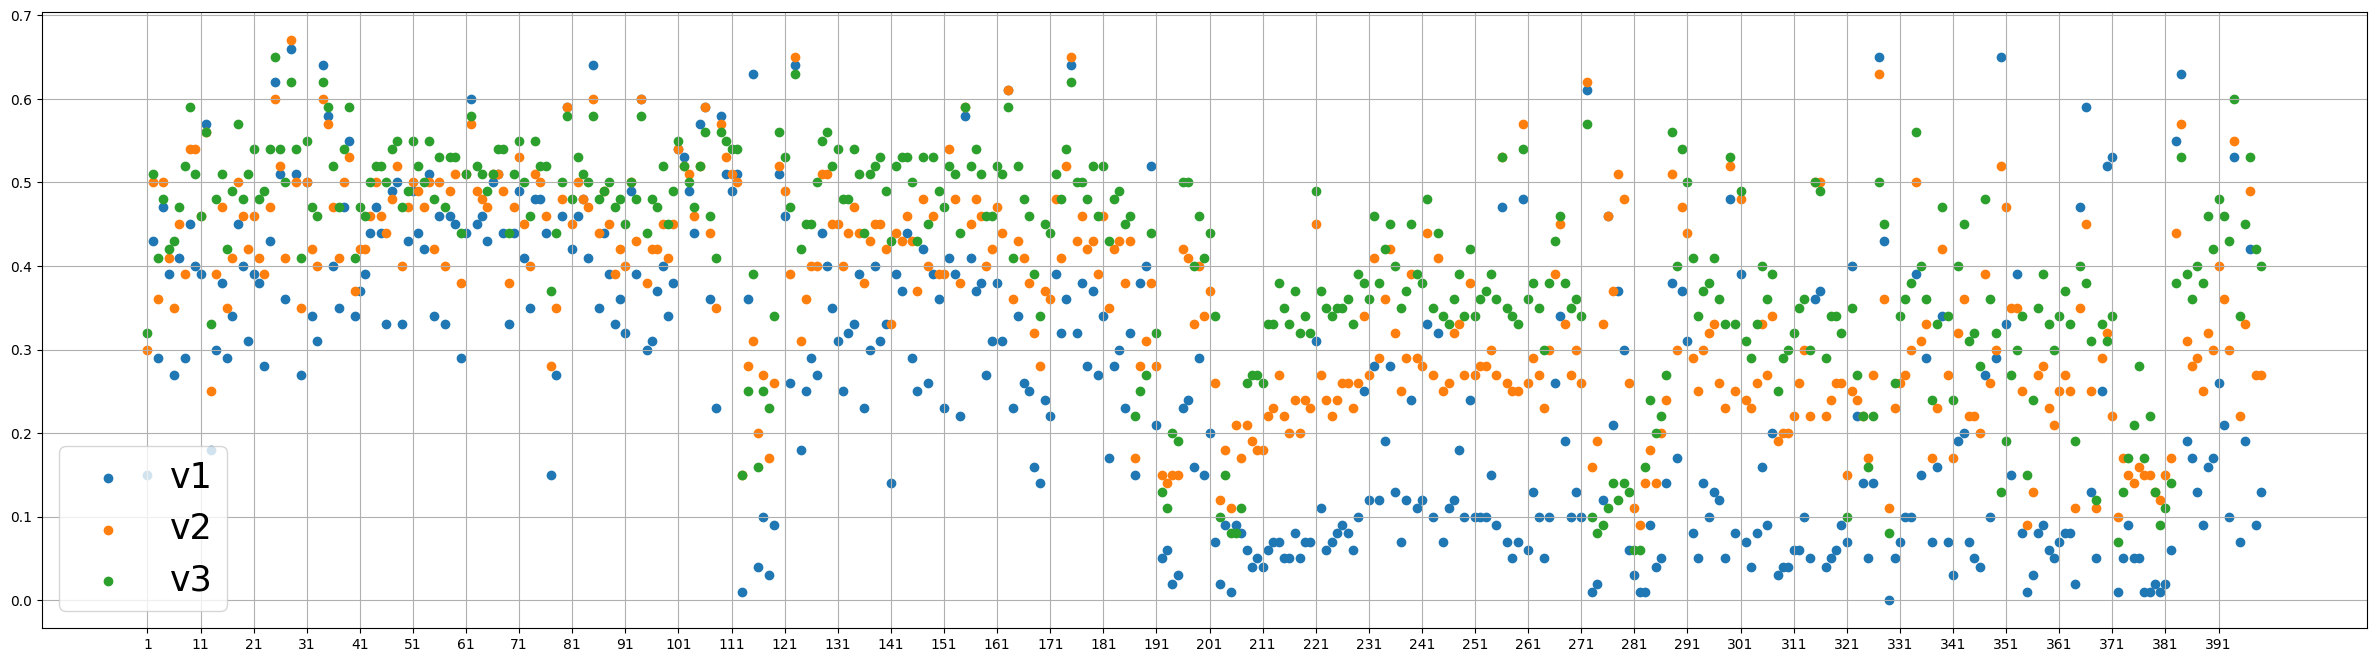

In [19]:
dir_name = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/Random_snr_1_3amin/'  
model_dir = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_U_jupyter_revised/'
MF_dir = '/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/'
for n in range(20, 90, 30):
    MFs = MF_dir + 'Test_Random_random_3_arcmin_MY_U_jupyter_with_seed_%03d.txt'%(n);
    print(MFs)
    test_data = np.load(dir_name + 'testing_data_Nico_T12amin_U20amin_348_random_snr_1_%03d.npy'%n)

    results = get_MFs_fix(input_patches=348, data_dir = test_data, model_dir = model_dir, MF_dir = MFs, checkpoint=test_forse.checkpoint)
    # plot_MF(results, titles[k], savedir = False)

In [21]:
for n in range(20, 90, 30):
    MFs = MF_dir + 'Test_Random_random_3_arcmin_MY_Q_jupyter_with_seed_%03d.txt'%(n);
    print(MFs)

    data = np.loadtxt(MFs)
    mf_mean = np.mean(data[:, 1:4], axis = 1)
    index = np.argsort(mf_mean)[::-1]+1
    print(index[:10])

/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_Q_jupyter_with_seed_020.txt
[246 212 257 213 228 231 258 211 217  10]
/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_Q_jupyter_with_seed_050.txt
[246 212 228 213 211 231  10 257  42 258]
/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_Q_jupyter_with_seed_080.txt
[246 212 213 228 231 211 257  10  42 258]


In [20]:
for n in range(20, 90, 30):
    MFs = MF_dir + 'Test_Random_random_3_arcmin_MY_U_jupyter_with_seed_%03d.txt'%(n);
    print(MFs)

    data = np.loadtxt(MFs)
    mf_mean = np.mean(data[:, 1:4], axis = 1)
    index = np.argsort(mf_mean)[::-1]+1
    print(index[:10])

/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_U_jupyter_with_seed_020.txt
[ 28 123 175  25 163  34 155  85  94 327]
/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_U_jupyter_with_seed_050.txt
[ 28 175 123  34 163  85  25 272 327  62]
/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_U_jupyter_with_seed_080.txt
[ 28 123 175  25  34  85 163 272 327  94]


# Test the best model

In [20]:
from ForSEplus import recompose_class
from ForSEplus import after_training_3amin as at3
from ForSEplus import utility, validation_class

In [47]:
from importlib import reload
reload(ForSEplus.utility)
reload(ForSEplus.after_training_3amin)

<module 'ForSEplus.after_training_3amin' from '/global/u2/j/jianyao/ForSEplus_github/src/ForSEplus/after_training_3amin.py'>

In [8]:
# test_forse.generator.save('/pscratch/sd/j/jianyao/forse_output/Random_model_PySM/model_3amin_h5_10U_2', save_format='h5')

In [9]:
# from after_training_12amin import post_training as post_training_12
# from after_training_3amin import post_training as post_training3
# from utility import from_12to13, from_12to20

In [8]:
def rescale_input(Ls):
    Ls_rescaled = np.zeros_like(Ls)
    for i in range(Ls.shape[0]):
            Ls_rescaled[i] = utility.rescale_min_max(Ls[i])
    Ls_rescaled = Ls_rescaled.reshape((Ls.shape[0], Ls.shape[1], Ls.shape[1], 1)) 
    return Ls_rescaled

dir_data = '/global/cfs/cdirs/sobs/www/users/ForSE/NN_datautils/datasets/'
# ss_I = np.load(dir_data+'GNILC_Thr12_Qlr80_20x20deg_Npix320_full_sky_adaptive.npy', allow_pickle=True)[0, 0:174]

ss_I = np.load(dir_data+'GNILC_Thr12_Qlr80_20x20deg_Npix320_full_sky_adaptive.npy', allow_pickle=True)[0, 0:348]

# Ls_Q80amin = np.load(dir_data + 'GNILC_Thr12_Qlr80_20x20deg_Npix320_full_sky_adaptive.npy', allow_pickle=True)[1, 0:174]*1e6
# Ls_U80amin = np.load(dir_data + 'GNILC_Thr12_Ulr80_20x20deg_Npix320_full_sky_adaptive.npy', allow_pickle=True)[1, 0:174]*1e6

gauss_ss_ps_12 = np.load('/pscratch/sd/j/jianyao/forse_output/gauss_small_scales_12_over_80_power_spectra.npy') #[2, 174, 49, 1, 25] Q, U
gauss_ss_mean_std_12 = np.load('/pscratch/sd/j/jianyao/forse_output/gauss_small_scales_12_over_80_mean_and_std.npy') #[4, 174, 49] Q_mean, Q_std, U_mean, U_std

gauss_ss_ps_3 = np.load('/pscratch/sd/j/jianyao/forse_output/gauss_small_scales_3_over_20_power_spectra_lmax_3500.npy') #[2, 174, 49, 1, 25] Q, U
gauss_ss_mean_std_3 = np.load('/pscratch/sd/j/jianyao/forse_output/gauss_small_scales_3_over_20_mean_and_std.npy') #[4, 174, 49] Q_mean, Q_std, U_mean, U_std

# ori_train_Q = np.load('/global/cfs/cdirs/sobs/www/users/ForSE/NN_datautils/datasets/GNILC_Thr12_Qlr80_20x20deg_Npix320_full_sky_adaptive.npy')[1, 0:174]
# ori_train_U = np.load('/global/cfs/cdirs/sobs/www/users/ForSE/NN_datautils/datasets/GNILC_Thr12_Ulr80_20x20deg_Npix320_full_sky_adaptive.npy')[1, 0:174]

In [25]:
Ls_13aminQ = np.load('/pscratch/sd/j/jianyao/SCRATCH/ForSE/NNout_Q_physical_units_13amin_from_Nico_notebook_cori_8526.npy')
Ls_13aminU = np.load('/pscratch/sd/j/jianyao/SCRATCH/ForSE/NNout_U_physical_units_13amin_from_Nico_notebook_cori_8526.npy')

In [14]:
maps_sub_20Q = np.load('/pscratch/sd/j/jianyao/SCRATCH/ForSE/NNout_Q_physical_units_20amin_from_Nico_notebook_cori.npy')
maps_sub_20U = np.load('/pscratch/sd/j/jianyao/SCRATCH/ForSE/NNout_U_physical_units_20amin_from_Nico_notebook_cori.npy')

In [30]:
maps_sub_20Q.shape

(8526, 320, 320)

In [9]:
import time

In [25]:
NNout_Q.shape

(49, 320, 320, 1)

In [26]:
NN_12amin_Q.shape

(174, 320, 320)

In [37]:
gauss_ss_mean_std_3[:, 33:34, :].shape

(4, 1, 49)

In [36]:
gauss_ss_mean_std_3.shape

(4, 174, 49)

In [35]:
np.newaxis?

Type:        NoneType
String form: None
Docstring:   <no docstring>


In [48]:
model_dir_Q = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_Q_jupyter_revised/'
model_dir_U = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_U_jupyter_revised/'
# ss_norm_dir_3 = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/4p1_random_3amin_renorm_from_deter_12amin_renorm/'
ss_norm_dir_3 = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/4p3_random_3amin_renorm_from_random_12amin_renorm_no_noise/'
save_dir = ss_norm_dir_3 + 'Random_3amin_from_12amin_snr_1/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)   
    
dir_name_12 = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/2_random_12amin_renormalized/New_realizations_1/'    
s = time.time() 
for i in range(1):
    
    # noise_1 = np.random.uniform(-1, 1, (174*49, 320, 320))
    noise_1 = None
    
    NN_12amin_Q = np.load(dir_name_12 + 'Random_1_testing_data_Nico_T12amin_1_Q80amin_renormalized_%03d.npy'%i)
    NN_12amin_U = np.load(dir_name_12 + 'Random_1_testing_data_Nico_T12amin_1_U80amin_renormalized_%03d.npy'%i)
    
    Ls_13aminQ, Ls_13aminU = utility.from_12to13([NN_12amin_Q[33]], [NN_12amin_U[33]], only_one = True) # to normalize the output from 3amin
    
    Ls_20aminQ, Ls_20aminU = utility.from_12to20([NN_12amin_Q[33]], [NN_12amin_U[33]], random_noise=noise_1, only_one = True)     
    
    Ls_rescaled_Q, Ls_rescaled_U = rescale_input(Ls_20aminQ), rescale_input(Ls_20aminU)
    
    del Ls_20aminQ, Ls_20aminU, noise_1
    
    test_forse.checkpoint.restore(model_dir_Q + 'training_checkpoints/ckpt-%s'%212)
    NNout_Q = test_forse.checkpoint.generator.predict(Ls_rescaled_Q)

    test_forse.checkpoint.restore(model_dir_U + 'training_checkpoints/ckpt-%s'%175)
    NNout_U = test_forse.checkpoint.generator.predict(Ls_rescaled_U)
    
    output3 = at3.post_training(NNout_Q, NNout_U, ss_I, Ls_13aminQ, Ls_13aminU, MF = False, patch_id = 33)
    # else:
    output3.NNout_Q = NNout_Q.reshape(1,49,320,320)
    output3.NNout_U = NNout_U.reshape(1,49,320,320);
    
    # del Ls_13aminQ, Ls_13aminU, NNout_Q, NNout_U
    
    output3.normalization(gauss_ss_ps_3, gauss_ss_mean_std_3, mask_path = './src/ForSEplus/mask_320x320.npy')
    
    # output3.combine_to_20by20(output3.NNmapQ_corr, output3.NNmapU_corr, maps = 'ss_norm')
    output3.combine_to_20by20(output3.NNmapQ_corr, output3.NNmapU_corr, maps = 'ss_norm')

In [49]:
output3.NN_20by20_Q_norm.shape

(1, 1280, 1280)

In [41]:
output3.NNmapU_corr.shape

(1, 49, 320, 320)

In [13]:
model_dir_Q = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_Q_jupyter_revised/'
model_dir_U = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_U_jupyter_revised/'
# ss_norm_dir_3 = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/4p1_random_3amin_renorm_from_deter_12amin_renorm/'
ss_norm_dir_3 = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/4p3_random_3amin_renorm_from_random_12amin_renorm_no_noise/'
save_dir = ss_norm_dir_3 + 'Random_3amin_from_12amin_snr_1/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)   
    
dir_name_12 = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/2_random_12amin_renormalized/New_realizations_1/'    
s = time.time() 
for i in range(1):
    
    # noise_1 = np.random.uniform(-1, 1, (174*49, 320, 320))
    noise_1 = None
    
    NN_12amin_Q = np.load(dir_name_12 + 'Random_1_testing_data_Nico_T12amin_1_Q80amin_renormalized_%03d.npy'%i)
    NN_12amin_U = np.load(dir_name_12 + 'Random_1_testing_data_Nico_T12amin_1_U80amin_renormalized_%03d.npy'%i)
    
    Ls_13aminQ, Ls_13aminU = utility.from_12to13(NN_12amin_Q, NN_12amin_U) # to normalize the output from 3amin
    
    Ls_20aminQ, Ls_20aminU = utility.from_12to20(NN_12amin_Q, NN_12amin_U, random_noise=noise_1)     
    
#     Ls_20aminQ = maps_sub_20Q + noise_1
#     Ls_20aminU = maps_sub_20U + noise_1 
    
    Ls_rescaled_Q, Ls_rescaled_U = rescale_input(Ls_20aminQ), rescale_input(Ls_20aminU)
    
    del Ls_20aminQ, Ls_20aminU, noise_1
    
    test_forse.checkpoint.restore(model_dir_Q + 'training_checkpoints/ckpt-%s'%212)
    NNout_Q = test_forse.checkpoint.generator.predict(Ls_rescaled_Q)

    test_forse.checkpoint.restore(model_dir_U + 'training_checkpoints/ckpt-%s'%175)
    NNout_U = test_forse.checkpoint.generator.predict(Ls_rescaled_U)

    file_name_Q = 'NN_out_Q_3amin_from_20amin_physical_units_20x20_1280_%03d.npy'%(i)
    file_name_U = 'NN_out_U_3amin_from_20amin_physical_units_20x20_1280_%03d.npy'%(i)
    
    # print('3amin: renormalize patches ...')
    # if i == 0:
    output3 = at3.post_training(NNout_Q, NNout_U, ss_I, Ls_13aminQ, Ls_13aminU, MF = False)
    # else:
    output3.NNout_Q = NNout_Q.reshape(174,49,320,320)
    output3.NNout_U = NNout_U.reshape(174,49,320,320);
    
    # del Ls_13aminQ, Ls_13aminU, NNout_Q, NNout_U
    
    output3.normalization(gauss_ss_ps_3, gauss_ss_mean_std_3, mask_path = './src/ForSEplus/mask_320x320.npy')
    
    # output3.combine_to_20by20(output3.NNmapQ_corr, output3.NNmapU_corr, maps = 'ss_norm')
    output3.combine_to_20by20(output3.NNmapQ_corr, output3.NNmapU_corr, maps = 'ss_norm', save_dir=[save_dir + file_name_Q, save_dir + file_name_U])
    # output3.combine_to_20by20(NNout_Q.reshape(174,49,320,320), NNout_U.reshape(174,49,320,320), maps = 'ss')
    
    del output3
    if i% 10 == 0 and i > 0:
        e = time.time()
        print('Average Time cost is %s mins'%((e - s)/60/i))

3amin: renormalize patches ...


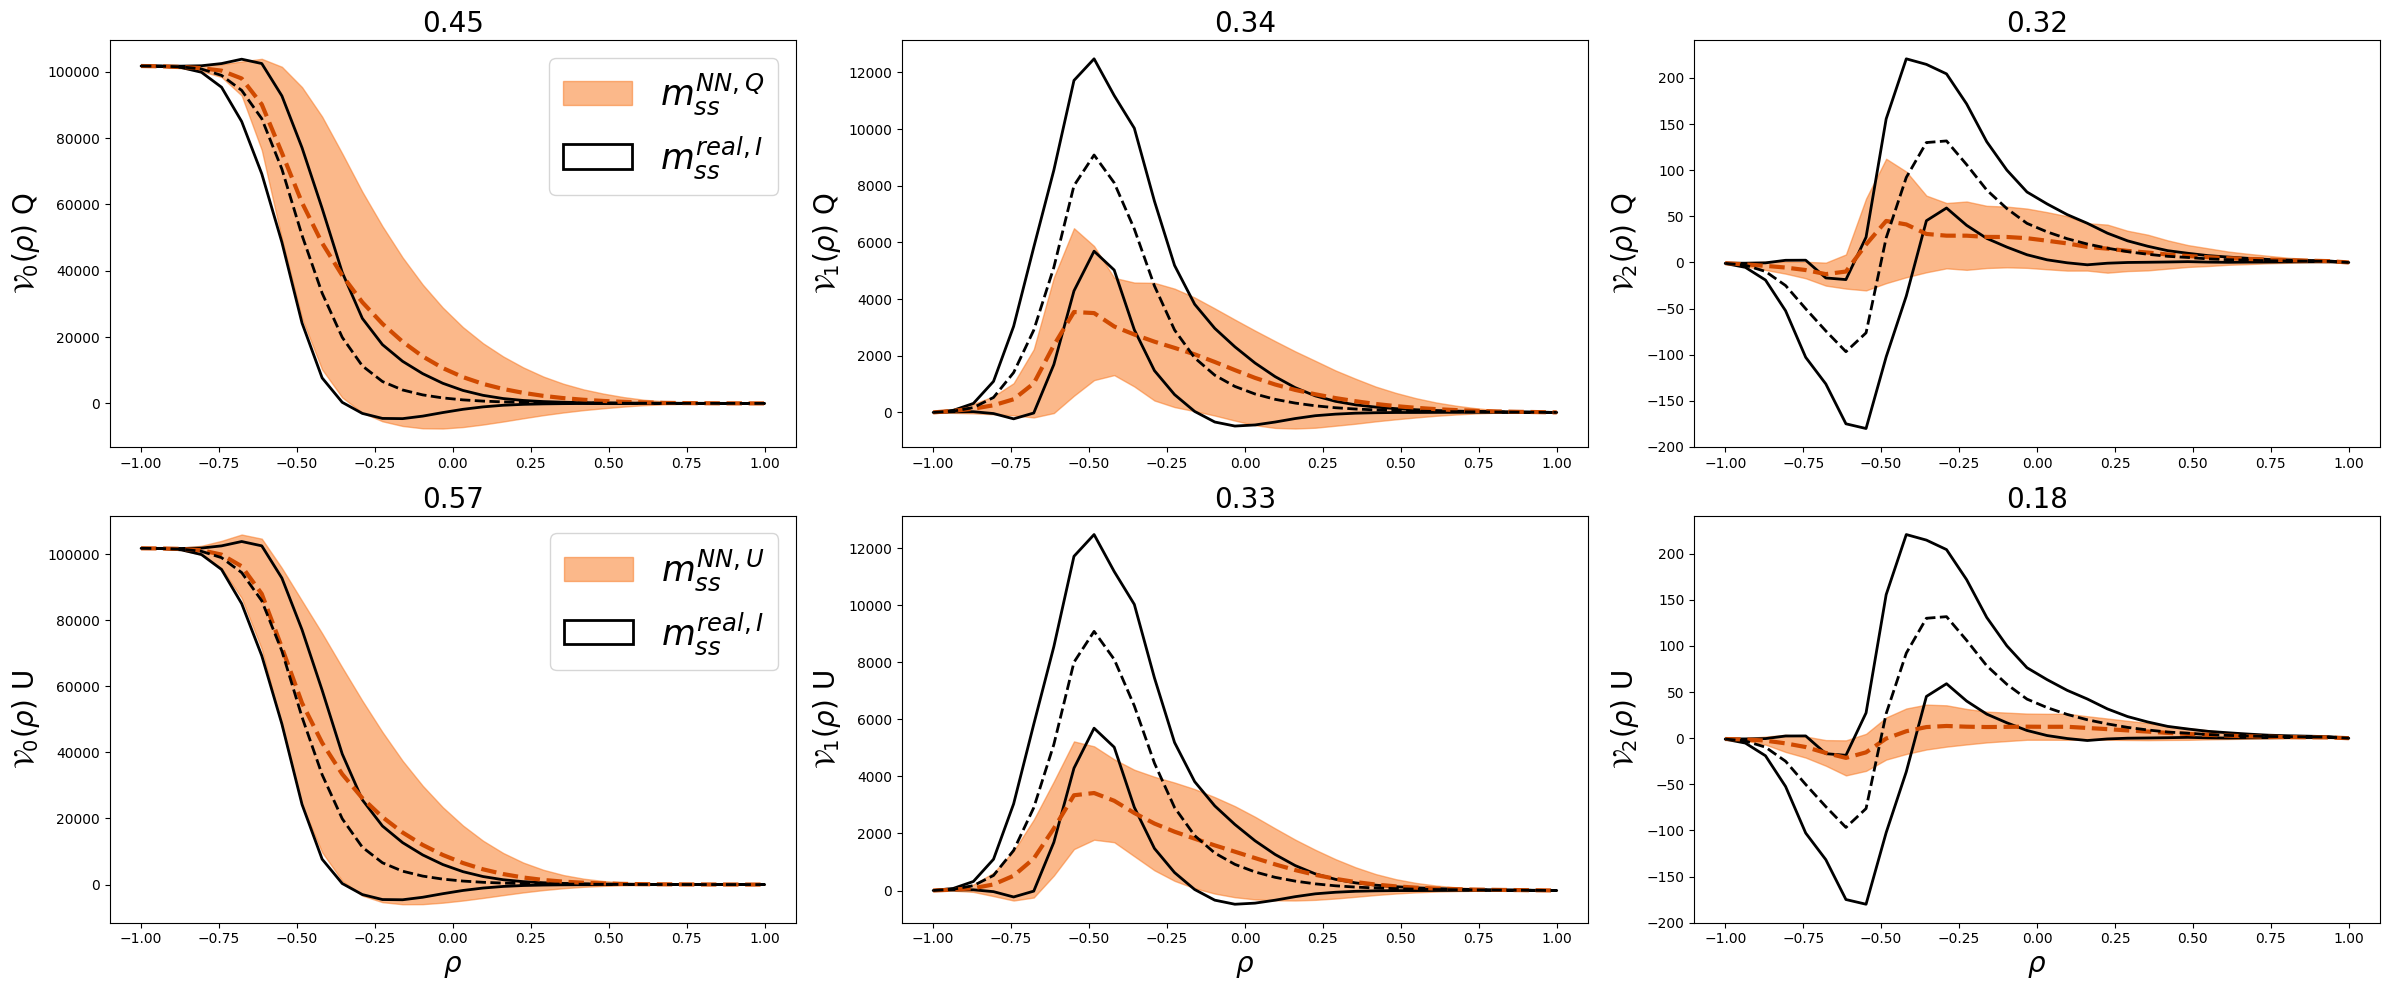

In [14]:
print('3amin: renormalize patches ...')
output3 = at3.post_training(NNout_Q, NNout_U, ss_I, Ls_13aminQ, Ls_13aminU, MF = True)
# output3 = at3.post_training(NNout_Q, NNout_U, ss_I, maps_sub_20Q, maps_sub_20U, MF = True)
output3.normalization(gauss_ss_ps_3, gauss_ss_mean_std_3, mask_path = './src/ForSEplus/mask_320x320.npy')
output3.combine_to_20by20(output3.NNmapQ_corr, output3.NNmapU_corr, maps = 'ss_norm')
output3.combine_to_20by20(NNout_Q.reshape(174,49,320,320), NNout_U.reshape(174,49,320,320), maps = 'ss')
test = output3.plot_MF(patch_N = 3, savedir=False)

In [2]:
save_dir = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/4p1_random_3amin_renorm_from_random_12amin_renorm/Random_3amin_from_12amin_snr_1/'
file_name_Q = 'NN_out_Q_3amin_from_20amin_physical_units_20x20_1280_%03d.npy'%(99)
file_name_U = 'NN_out_U_3amin_from_20amin_physical_units_20x20_1280_%03d.npy'%(99)

In [15]:
recom_3 = recompose_class.recom(npix = 1280, pixelsize = 0.9375, overlap = 2, nside = 4096, 
                 apodization_file = '/pscratch/sd/j/jianyao/mask_1280*1280.npy', 
                 xy_inds_file = '/pscratch/sd/j/jianyao/forse_recompose/recompose_xinds_yinds_4096', 
                 index_sphere_file = '/pscratch/sd/j/jianyao/forse_recompose/recompose_footprint_healpix_index_4096', verbose=False)

print('3amin: reproject to full sky ...')
full_Q = recom_3.recompose_fast(output3.NN_20by20_Q_norm)
full_U = recom_3.recompose_fast(output3.NN_20by20_U_norm) 

maps_3amin = utility.correct_EB(full_Q, full_U)

# del output3
# end = time.time()

# print('Time cost %.02f'%((end - start)/60))

3amin: Initializing the re-projection ...
3amin: reproject to full sky ...


In [ ]:
NN_20by20_Q = np.load(save_dir + file_name_Q)
NN_20by20_U = np.load(save_dir + file_name_U)

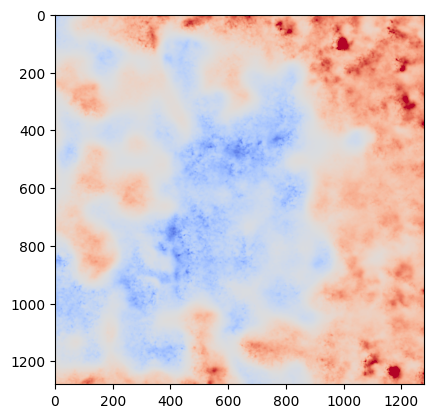

In [17]:
plt.imshow(NN_20by20_Q[33], vmin = -30, vmax = 30)

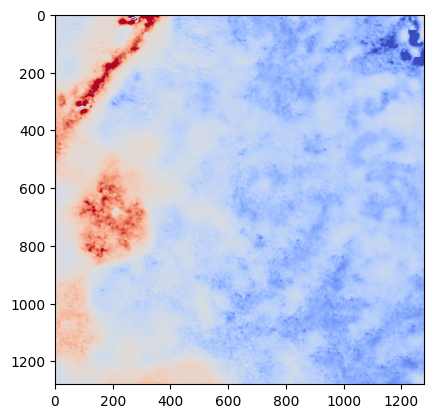

In [20]:
plt.imshow(NN_20by20_U[33], vmin = -60, vmax = 60)

# validation the output of the model

In [16]:
from pathlib import Path
import healpy as hp
import pysm3
import pysm3.units as u

In [17]:
maps_80amin = hp.read_map('/pscratch/sd/j/jianyao/COM_CompMap_IQU-thermaldust-gnilc-unires_2048_R3.00.fits', field = None)[1:3]*1e6 
poltens = hp.ud_grade(hp.read_map('/pscratch/sd/j/jianyao/dust_gnilc_varres_pysm_circles_uK_RJ_lmax_6143_nside_2048.fits', field = None)/0.07748637 ,nside_out = 2048)
# from uK_RJ to uK_CMB
poltens_3amin = hp.smoothing(poltens, fwhm=3/60/180*np.pi)
# poltens_3amin =  np.array((hp.ud_grade(poltens_3amin[1], nside_out = 2048), hp.ud_grade(poltens_3amin[2], nside_out = 2048)))

In [18]:
cls_pt = np.load('/global/homes/j/jianyao/Small_Scale_Foreground/cls_poltens_maps_0320.npz', allow_pickle=True)
cls_full_pt = cls_pt['cls_full_pt'].item()
cls_80p_pt = cls_pt['cls_80p_pt'].item()
cls_40p_pt = cls_pt['cls_40p_pt'].item()

weights loaded from /pscratch/sd/j/jianyao/w22_2048_80_sky_lmax_4096_nbins_40.fits
weights loaded from /pscratch/sd/j/jianyao/w22_2048_40_sky_lmax_4096_nbins_40.fits
weights loaded from /pscratch/sd/j/jianyao/w22_512_bicep.fits
weights loaded from /pscratch/sd/j/jianyao/w22_512_bicep.fits
weights loaded from /pscratch/sd/j/jianyao/w22_512_bicep.fits


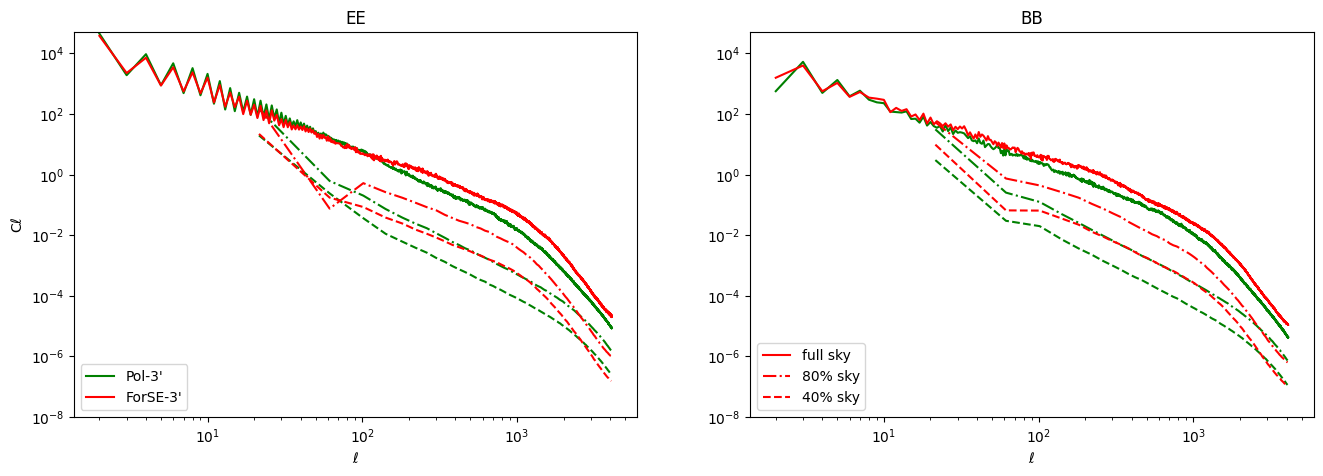

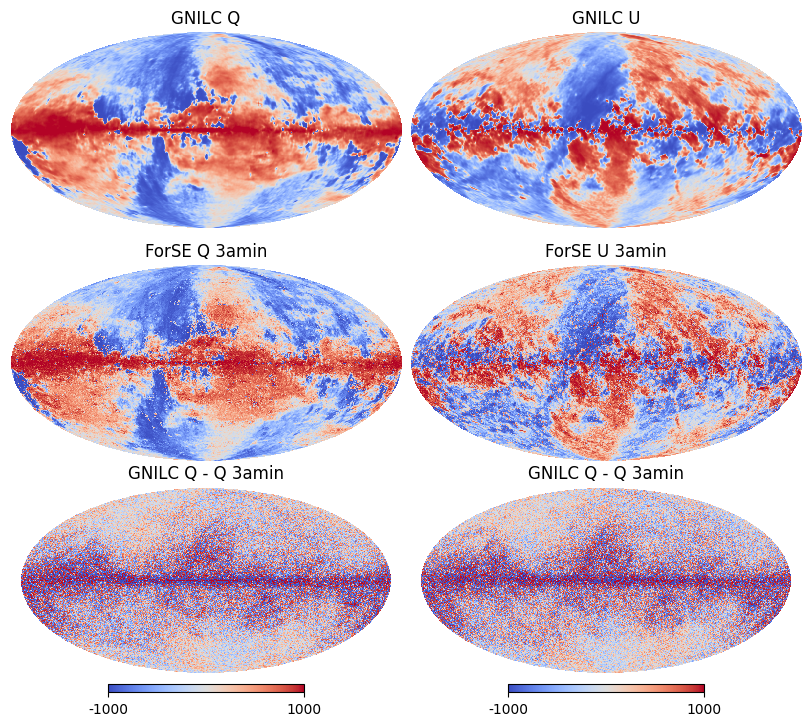

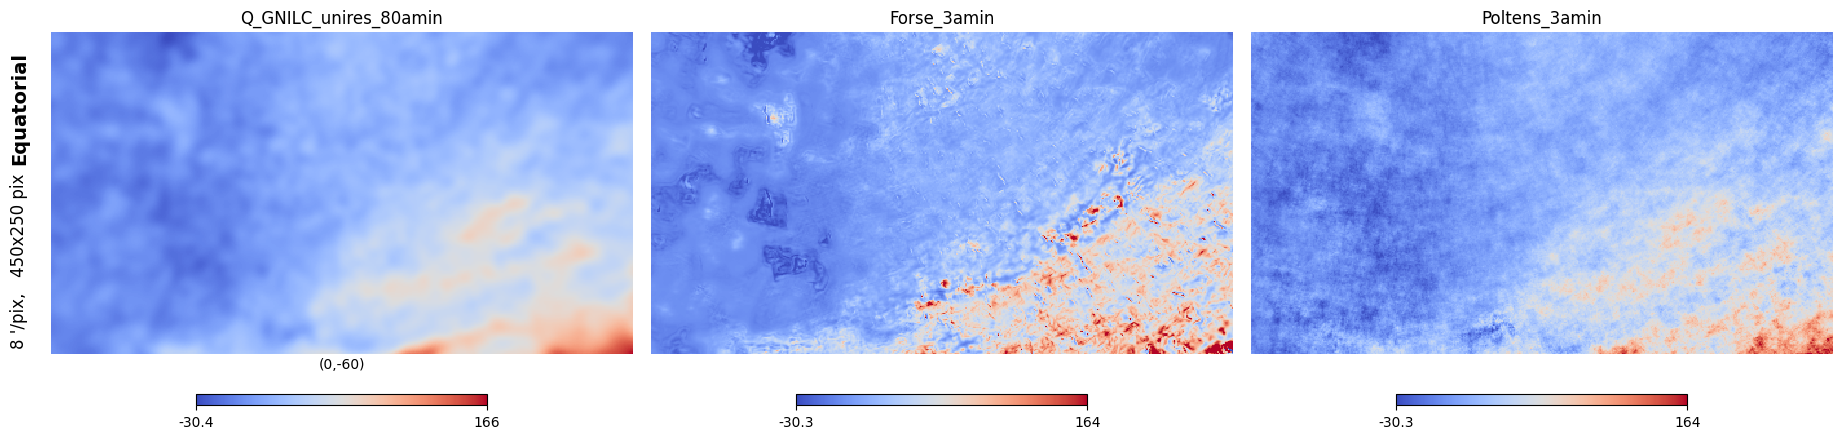

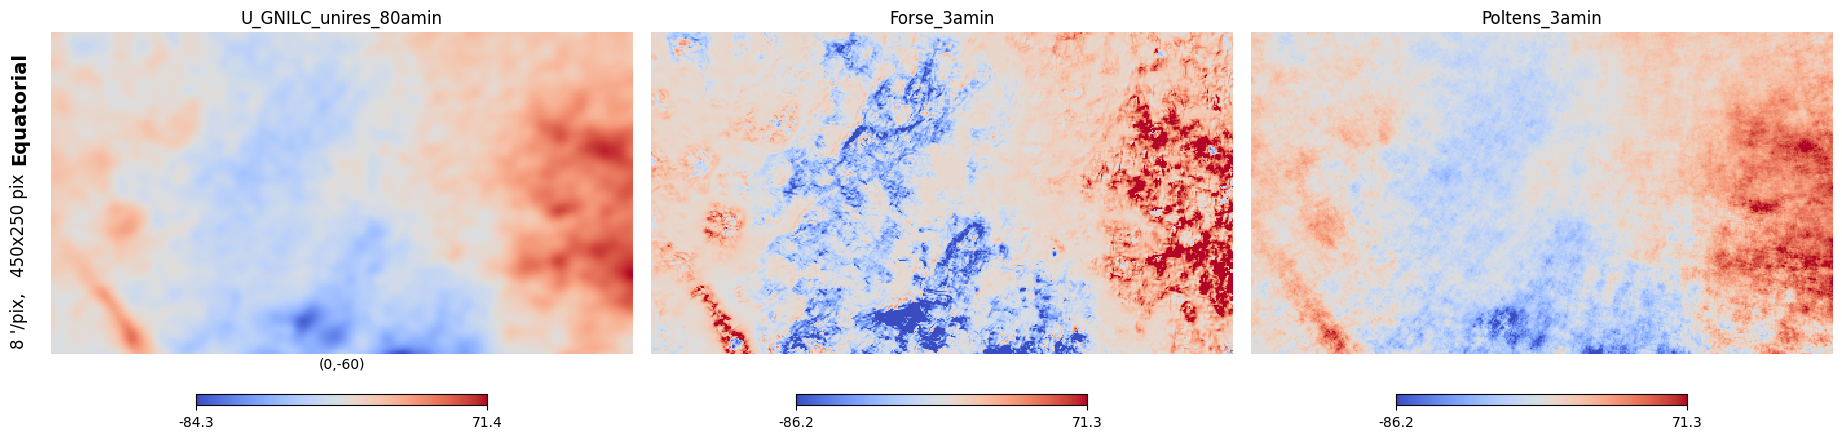

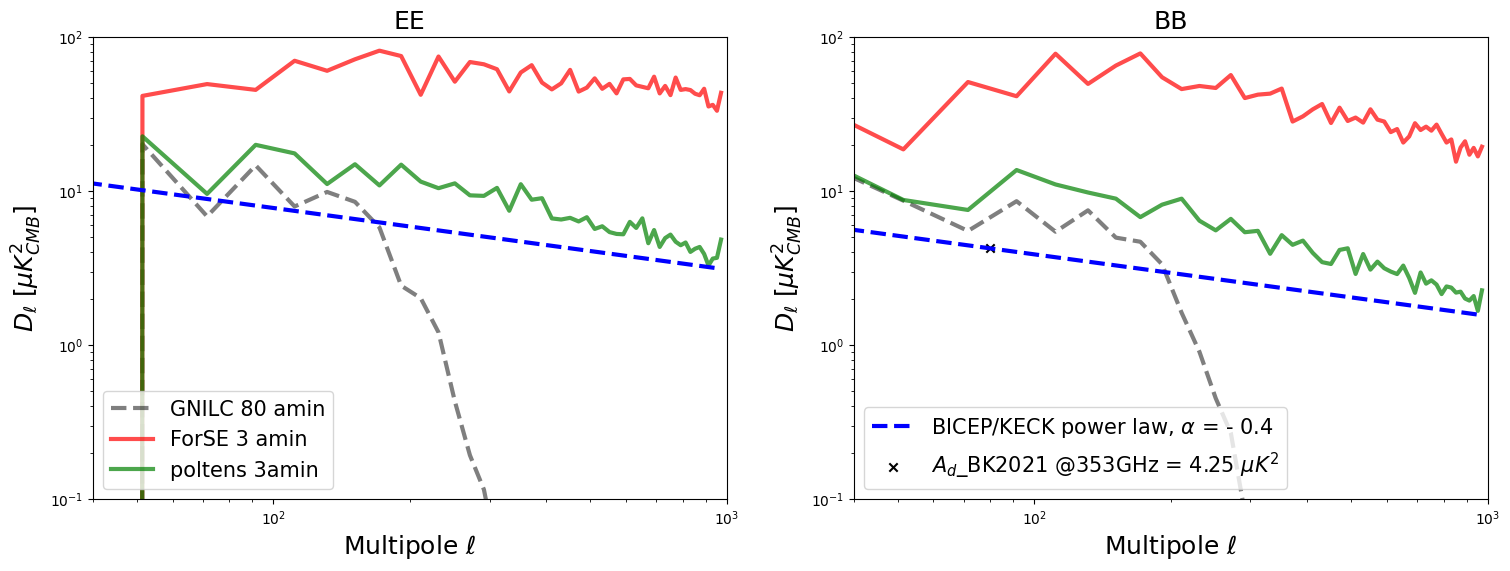

In [19]:
planck_mask = hp.read_map('/pscratch/sd/j/jianyao/HFI_Mask_GalPlane-apo2_2048_R2.00.fits', field = None)
bkmaskfile = Path('/pscratch/sd/j/jianyao/bk14_mask_gal_n0512.fits')
maskbk= hp.read_map(bkmaskfile , verbose=False)
idx = np.where((maskbk < 0) | (~np.isfinite(maskbk)))
maskbk [idx] = 0

check_3 = validation_class.validate_3amin(maps_80amin, maps_3amin, poltens_3amin[1:]) # maps only contain QU 
check_3.cls_check_sky(maps_3amin, planck_mask, lmax = 4096, color = 'r', label = 'ForSE-3\'', cls_pt = [cls_full_pt, cls_80p_pt, cls_40p_pt])
check_3.show_fullsky()
check_3.show_patch()

cls_all_patches = check_3.cls_check_patch(maskbk)

weights loaded from /pscratch/sd/j/jianyao/w22_2048_80_sky_lmax_4096_nbins_40.fits
weights loaded from /pscratch/sd/j/jianyao/w22_2048_40_sky_lmax_4096_nbins_40.fits
weights loaded from /pscratch/sd/j/jianyao/w22_512_bicep.fits
weights loaded from /pscratch/sd/j/jianyao/w22_512_bicep.fits
weights loaded from /pscratch/sd/j/jianyao/w22_512_bicep.fits


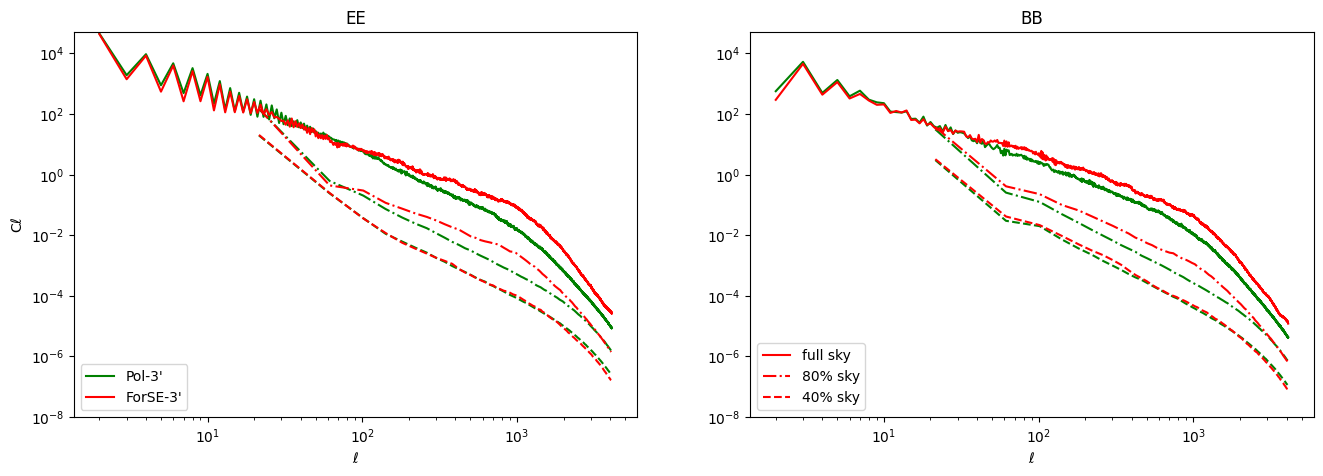

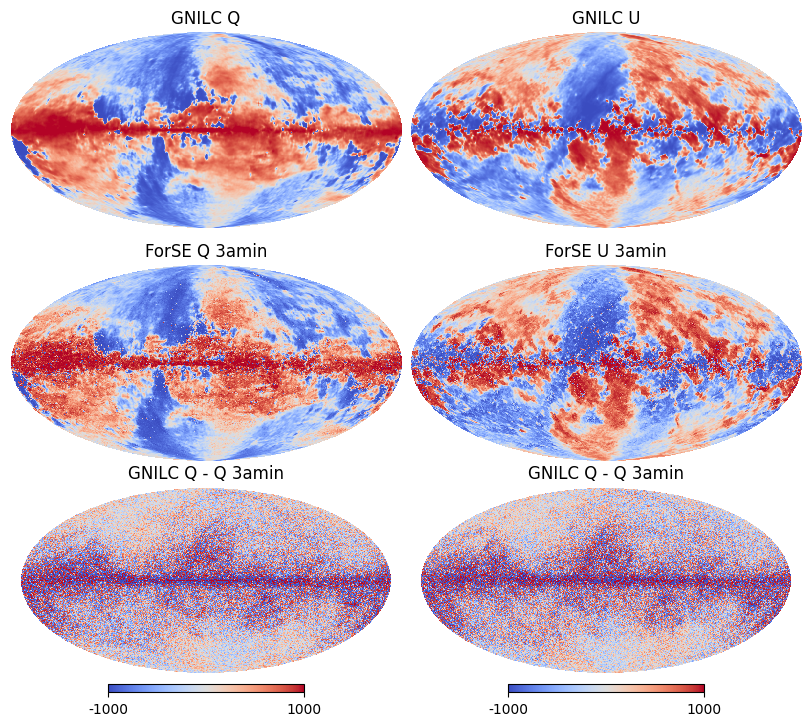

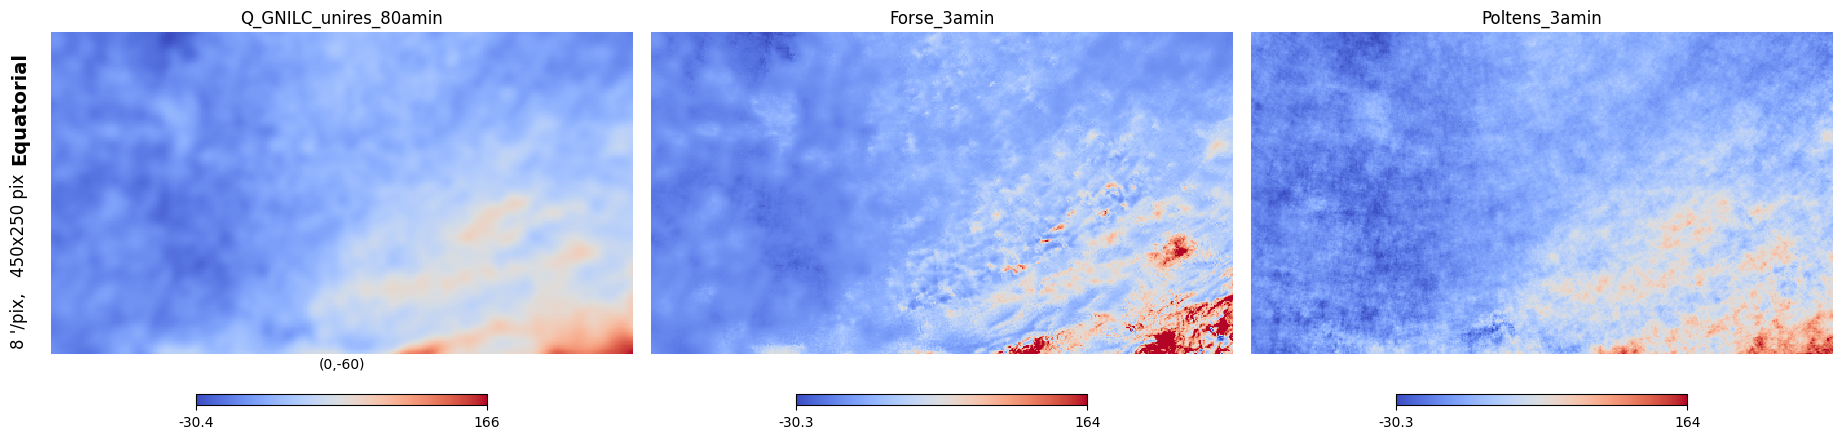

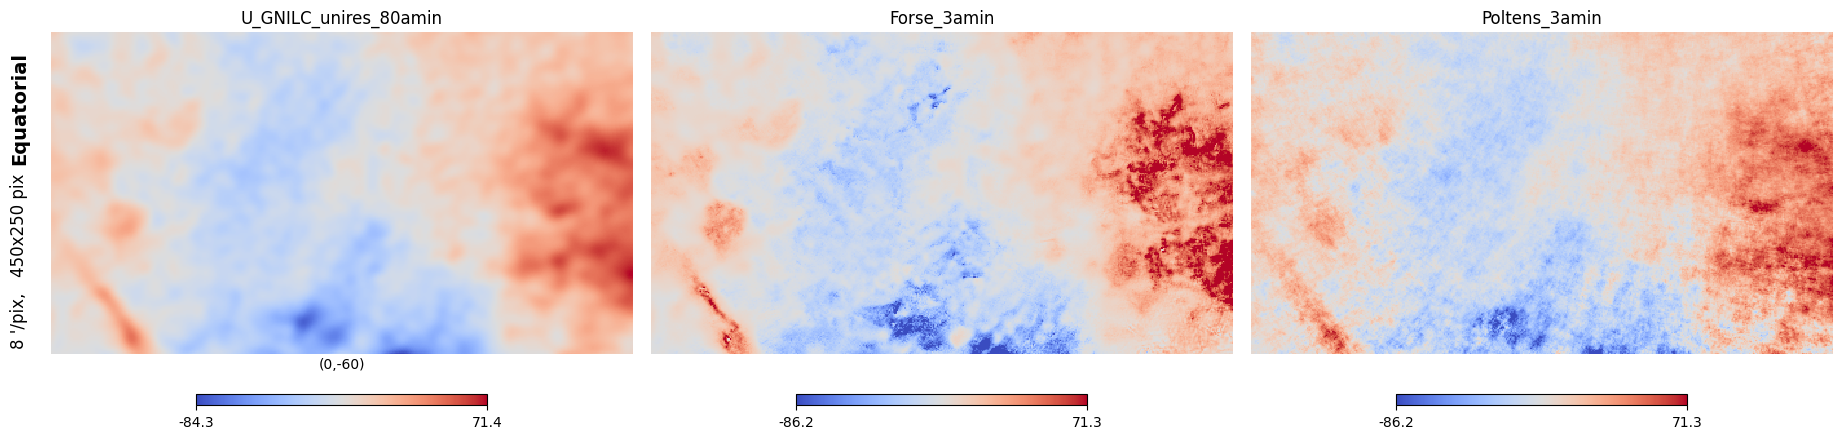

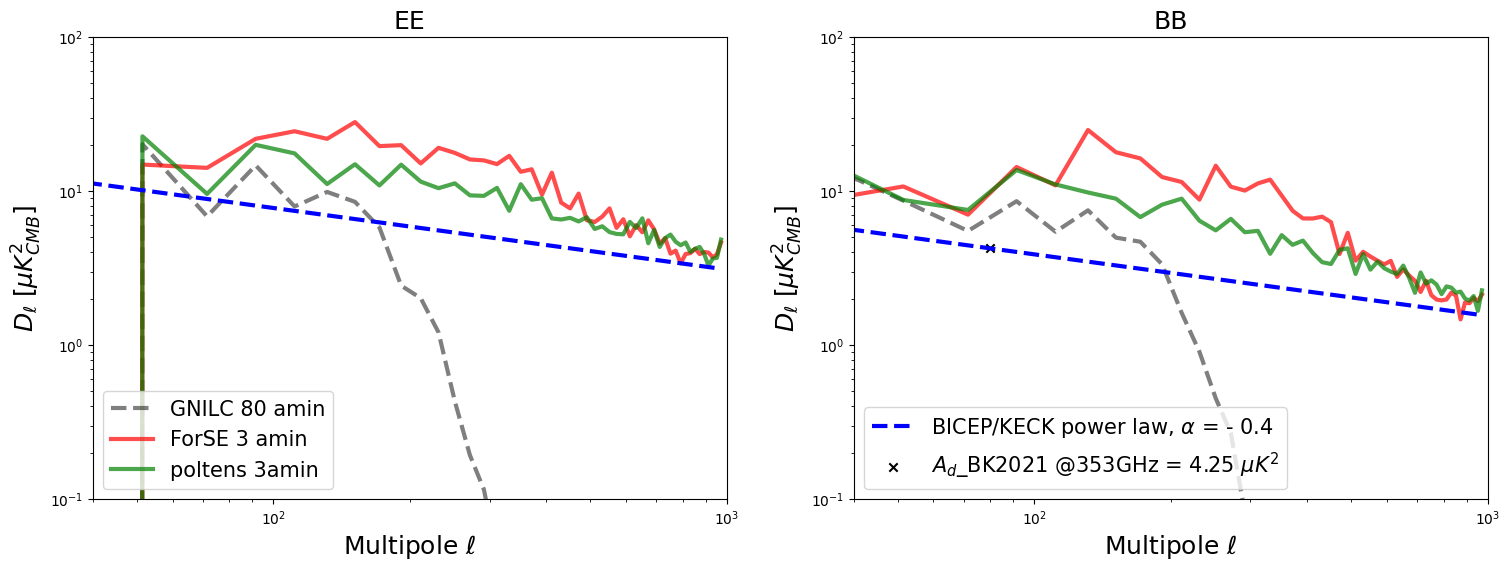

# load model

In [5]:
from importlib import reload
import forse_plus
reload(forse_plus)

<module 'forse_plus' from '/global/u2/j/jianyao/ForSEplus_github/src/ForSEplus/forse_plus.py'>

In [6]:
from forse_plus import forsev2

In [7]:
data_dir = '/pscratch/sd/j/jianyao/'
test_model = forsev2(data_dir, snr = 1, go_three = False, three_only = False, validation = False, correct_EB=True)

2023-05-23 16:53:50.538623: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 16:53:51.137512: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78944 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:c3:00.0, compute capability: 8.0


In [ ]:
data_rev = test_model.run()

12amin: Start!
12amin: Generating input random noise with model SNR = 1...
12amin Generating patches...


2023-05-23 16:55:13.070462: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-05-23 16:55:14.207319: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8302


12amin: Renormalize patches...
12amin: Initializing the re-projection...
12amin: reproject to full sky ...
12amin: Complete the reprojection!
Reprojecting to full sky takes 3.01 seconds
12amin: Complete the reprojection!
Reprojecting to full sky takes 2.88 seconds
12amin: correct the E/B ratio


In [10]:
data_rev.shape

(1, 2, 50331648)

In [6]:
del data_rev

In [41]:
from utility import correct_EB
import time

In [42]:
s = time.time()
temp = correct_EB(test_model.maps_12amin[0], test_model.maps_12amin[1])
e = time.time()

print((e-s)/60.0)

3.764796872933706


In [39]:
test_model.maps_12amin.shape

(2, 50331648)

time cost of 2 cores

12amin: Start!
12amin: Generating input random noise with model SNR = 1...
12amin Generating patches...
12amin: Renormalize patches...
12amin: Initializing the re-projection...
12amin: reproject to full sky ...
12amin: Complete the reprojection!
Reprojecting to full sky takes 3.28 seconds
12amin: Complete the reprojection!
Reprojecting to full sky takes 3.31 seconds
12amin: Finishing
Time cost to 12amin is: 0.46 minutes!
3amin: Start!
3amin: Generating patches...
3amin: renormalize patches ...
3amin: Initializing the re-projection ...
3amin: reproject to full sky ...
3amin: Complete the reprojection!
Reprojecting to full sky takes 13.06 seconds
3amin: Complete the reprojection!
Reprojecting to full sky takes 13.37 seconds
Total time cost is: 6.20 minutes!

In [1]:
import os

os.environ[
    "OMP_NUM_THREADS"
] = "64"  # for jupyter.nersc.gov otherwise the notebook only uses 2 cores

import numpy as np

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [2]:
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
